<a href="https://colab.research.google.com/github/Noor-Z1/PAMAP2-DataAnalysis-ML/blob/main/DataAnalysis/ExploratoryDataAnalysis_PAMAP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNG 514 - Term Project**

### Notebook # 1




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Overview

For this project, the dataset used is PAMAP2 which is an Activity Monitoring dataset that covers 18 different physical activities which are taken by 9 different subjects, 8 men and 1 woman, taken using 3 inertial measurement units and a heart rate monitor.



### Preparatory Tasks

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [ ]:
# Load data from drive

list_of_files = ['/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject101.dat',
                 '/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject102.dat',
                 '/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject103.dat',
                 '/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject104.dat',
                 '/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject105.dat',
                 '/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject106.dat',
                 '/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject107.dat',
                 '/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject108.dat',
                 '/content/drive/MyDrive/PAMAP2_Dataset/Protocol/subject109.dat' ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature',
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
           'handGyro1', 'handGyro2', 'handGyro3',
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature',
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
           'chestGyro1', 'chestGyro2', 'chestGyro3',
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature',
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  # all columns in one list

len(columns)


54

In [ ]:
import pandas as pd

data_frames = []
for file in list_of_files:
    proc_data = pd.read_table(file, header=None, sep='\s+')
    proc_data.columns = columns
    proc_data['subject_id'] = int(file[-5])
    data_frames.append(proc_data)

data_collection = pd.concat(data_frames, ignore_index=True)
data_collection.reset_index(drop=True, inplace=True)
data_collection.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


In [ ]:
data_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          float64
 1   activityID         int64  
 2   heartrate          float64
 3   handTemperature    float64
 4   handAcc16_1        float64
 5   handAcc16_2        float64
 6   handAcc16_3        float64
 7   handAcc6_1         float64
 8   handAcc6_2         float64
 9   handAcc6_3         float64
 10  handGyro1          float64
 11  handGyro2          float64
 12  handGyro3          float64
 13  handMagne1         float64
 14  handMagne2         float64
 15  handMagne3         float64
 16  handOrientation1   float64
 17  handOrientation2   float64
 18  handOrientation3   float64
 19  handOrientation4   float64
 20  chestTemperature   float64
 21  chestAcc16_1       float64
 22  chestAcc16_2       float64
 23  chestAcc16_3       float64
 24  chestAcc6_1        float64
 25  chestAcc6_2       

In [ ]:
data_collection.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,...,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,...,-3.450122e-02,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,4.500478e+00
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,...,5.966026e-01,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.000000e+00
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685818e-01,-8.933270e+00,1.284680e+00,1.164040e+00,...,-8.267093e-02,-3.084595e-01,-4.289480e+01,-1.148540e+01,3.289348e+00,1.563440e-01,-5.839910e-01,1.087023e-02,-5.047580e-01,2.000000e+00
50%,1.790830e+03,3.000000e+00,108.000000,3.312500e+01,-5.788145e+00,3.570830e+00,2.958415e+00,-5.737615e+00,3.613430e+00,3.132855e+00,...,-4.249850e-03,-2.216015e-03,-3.390020e+01,1.362615e+00,1.809105e+01,3.197555e-01,0.000000e+00,3.043820e-01,0.000000e+00,5.000000e+00
75%,2.710570e+03,7.000000e+00,125.000000,3.400000e+01,-7.829420e-01,6.602720e+00,6.002930e+00,-7.249920e-01,6.601960e+00,6.257612e+00,...,8.296868e-02,6.343258e-02,-1.905920e+01,1.733090e+01,3.087820e+01,5.794420e-01,6.279450e-01,6.020032e-01,4.634432e-01,7.000000e+00
max,4.475630e+03,2.400000e+01,202.000000,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.194460e+01,...,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.923540e-01,9.961050e-01,9.000000e+00


In [ ]:
data_collection.isna().sum()

timestamp                  0
activityID                 0
heartrate            2610265
handTemperature        13141
handAcc16_1            13141
handAcc16_2            13141
handAcc16_3            13141
handAcc6_1             13141
handAcc6_2             13141
handAcc6_3             13141
handGyro1              13141
handGyro2              13141
handGyro3              13141
handMagne1             13141
handMagne2             13141
handMagne3             13141
handOrientation1       13141
handOrientation2       13141
handOrientation3       13141
handOrientation4       13141
chestTemperature        3563
chestAcc16_1            3563
chestAcc16_2            3563
chestAcc16_3            3563
chestAcc6_1             3563
chestAcc6_2             3563
chestAcc6_3             3563
chestGyro1              3563
chestGyro2              3563
chestGyro3              3563
chestMagne1             3563
chestMagne2             3563
chestMagne3             3563
chestOrientation1       3563
chestOrientati

As it can be seen from the sample of the dataframe that we produced, there is some data cleaning required. For instance, activityID 0 must be removed completely from our dataset since this is transient period where the subject was not doing any particular activity as discussed in the readme file that was given. Data cleaning will be discussed thoroughly in the following section.

### Data Cleaning

From a look at the **PerformedActivitiesSummary** file which is part of the collection of files given, it can be seen that various data is missing and as the **readme** file comments on, there were some wireless disconnections in data collection therefore the missing data has to be accounted for and made up in a way that our data analysis will not be impacted. More in depth, each different activity has 8 or less subjects which did the activity and each different activity has NaN values for various subjects. Therefore some data filling has be applied. As for the NaN values in our data, it is best to use **interpolate** which is constructing a new data point out of a set of known data points.

As a guideline for the code written below, interpolation happens after removing 'activity 0' as it has very noisy and would data which would impact the output massively as the values given in heart rate would not be produced from the data point set that is of activities that actually matter.

In [ ]:
def dataCleaning(dataCollection):
        dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  # removal of orientation columns as they are not needed

        dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used

        dataCollection = dataCollection.apply(pd.to_numeric) #removal of non numeric data in cells

        dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points

        return dataCollection


In [ ]:
dataCol = dataCleaning(data_collection)

In [ ]:
dataCol.reset_index(drop = True, inplace = True)
dataCol.head(10)

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1
5,37.71,1,100.0,30.375,2.07165,7.25965,6.01218,2.19238,7.21038,6.01604,...,9.60177,-1.75239,0.311276,0.003793,-0.026906,0.004125,-61.3257,-36.9744,-57.7501,1
6,37.72,1,100.0,30.375,2.41148,7.59780,5.93915,2.23988,7.46679,6.03053,...,9.67694,-1.76748,0.326060,0.036814,-0.032277,-0.006866,-61.5520,-36.9632,-57.9957,1
7,37.73,1,100.0,30.375,2.32815,7.63431,5.70686,2.31663,7.64745,6.01495,...,9.61685,-1.76749,0.326380,-0.010352,-0.016621,0.006548,-61.5738,-36.1724,-59.3487,1
8,37.74,1,100.0,30.375,2.25096,7.78598,5.62821,2.28637,7.70801,5.93935,...,9.61686,-1.72212,0.326234,0.039346,0.020393,-0.011880,-61.7741,-37.1744,-58.1199,1
9,37.75,1,100.0,30.375,2.14107,7.52262,5.78141,2.31538,7.72276,5.78828,...,9.63189,-1.70699,0.326105,0.029874,-0.010763,0.005133,-60.7680,-37.4206,-58.8735,1


The reason why heartrate still has NaN values is because interpolation calculates the values around the NaN cell. Since the first cells are NaN it is normal to generate new NaN values after interpolation. To overcome this problem we can assume that the value of the first 4 cells is 100 since the values after the index 4 is 100. Doing so will eliminate any NaN values from our dataset.

In [ ]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           4
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [ ]:
for i in range(0,4):
    dataCol["heartrate"].iloc[i]=100

<ipython-input-12-8eb17c7fa186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCol["heartrate"].iloc[i]=100
<ipython-input-12-8eb17c7fa186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCol["heartrate"].iloc[i]=100
<ipython-input-12-8eb17c7fa186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCol["heartrate"].iloc[i]=100
<ipython-input-12-8eb17c7fa186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy

It is clear that there are no missing values but we can check just to be sure.

In [ ]:
dataCol.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [ ]:
dataCol

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942867,95.06,24,162.0,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,9
1942868,95.07,24,162.0,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,9
1942869,95.08,24,162.0,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,9
1942870,95.09,24,162.0,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,9


## Exploratory Data Analysis

## See class distribution
Check if our dataset is balanced

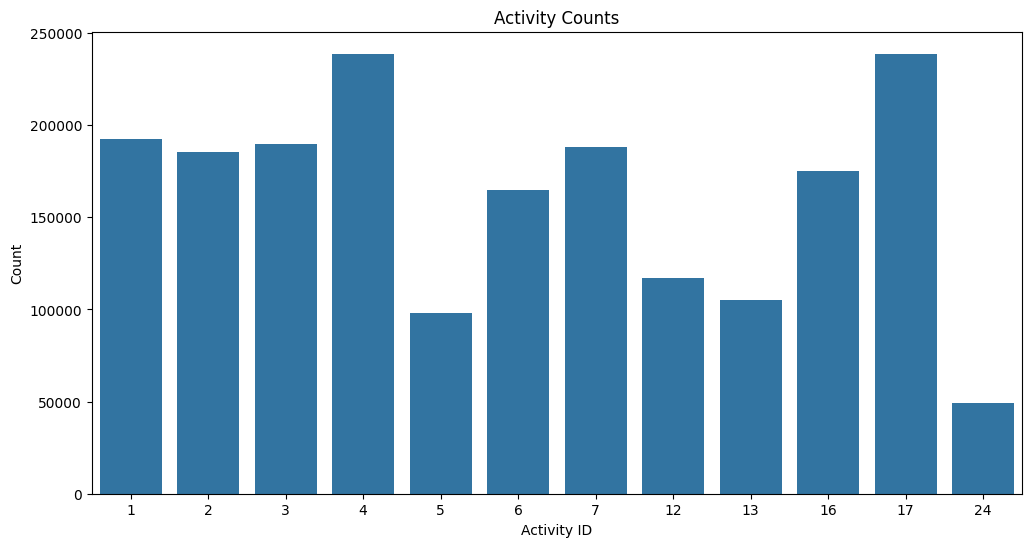

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataCol is your DataFrame containing the 'activityID' column
plt.figure(figsize=(12, 6))
sns.countplot(data=dataCol, x='activityID')
plt.title('Activity Counts')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.show()


We are going to focus on heart rate as it is our most precice meter of check for tracking subjects during activities as implied by the various indications on the readme file of the dataset. With that in mind, looking at the table, we can observe that the mean heart rate throughout the dataset is 107.4 . Furthermore the minimum heart rate is 57 and the maximum heart rate is 202. The quartiles that are shown can be further analysed by plotting a box plot which will help with understanding our outliers and quartiles groups and also shown the mean of our data's heart rate.

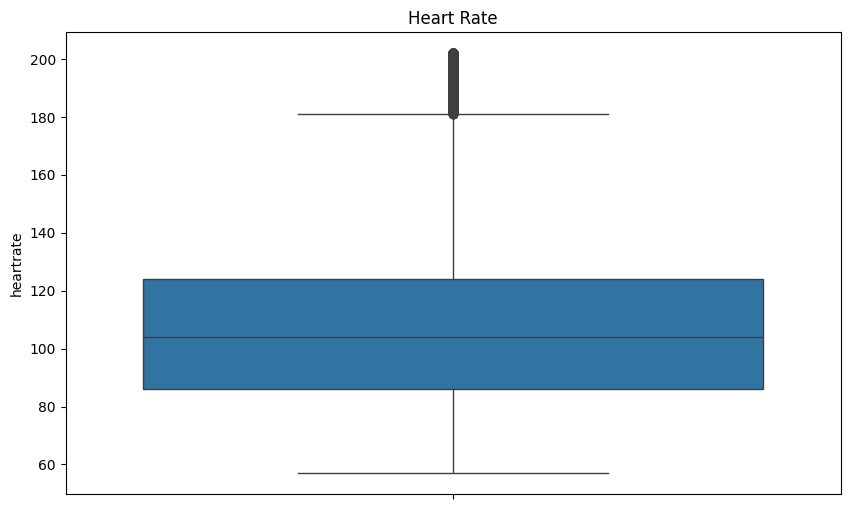

In [ ]:
# Boxplot of Heartrate

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(dataCol['heartrate'])
plt.title("Heart Rate")
plt.show()

Looking at the box plot, we can see that the outliers have heart rate from 180 up to 202. Our highest quartile group out of the four starts from 124 which is the end of the Inter-quartile range and finishes at 180 which also makes it our biggest group by looking at the size of it on the box plot compared to the other quartiles. Meaning that the biggest amount of subjects on the activities performed had heart rate of 124 up to 180. Our third quartile group starts from the mean value which is 107.4 which is where the horizontal line in our box is, and finishes at the end of the Inter-quartile range which is 124. Our second quartile group, starts from the start of the Inter-quartile range which is 86 and ends at the mean value 124. Our first quartile group starts from the lowest data point, 57 and ends at the start of the Inter-quartile range 86. Our box plot also shows that most subjects performed some activities at a statistically similar way but failed to do the same in all activities which explains the big upper quartile group.

To find the most cumbersome activities we have to plot a bar chart which will show the mean values of heart rate for each activity that was performed. This will in return enable us to analyse further specific activity data. The names of the activities will be used for easier analysis of results.

Later for models training and testing we will use RobustScaler that takes care of the outlier data

<Axes: xlabel='activityID'>

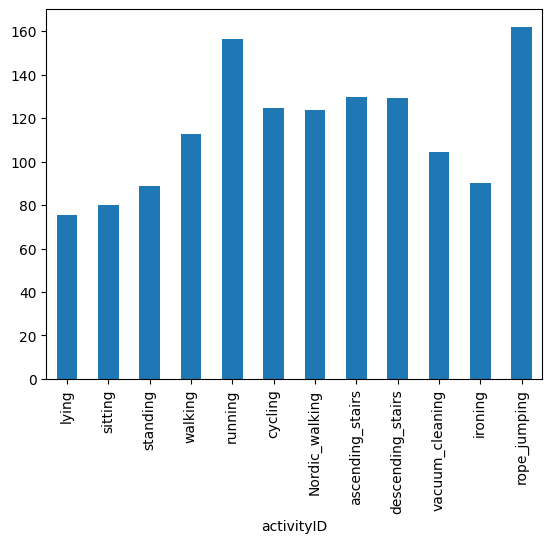

In [ ]:
df_hr_act = dataCol['heartrate'].groupby(dataCol['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')

The bar chart shows that Rope Jumping and Running are the most cumbersome activities out of all the activities.

To check further on our data to see any anormalities, we have to plot a heat map which will show whether our data has correlations inbetween it. All columns will be used in order to understand the extend of problems, if there are any.

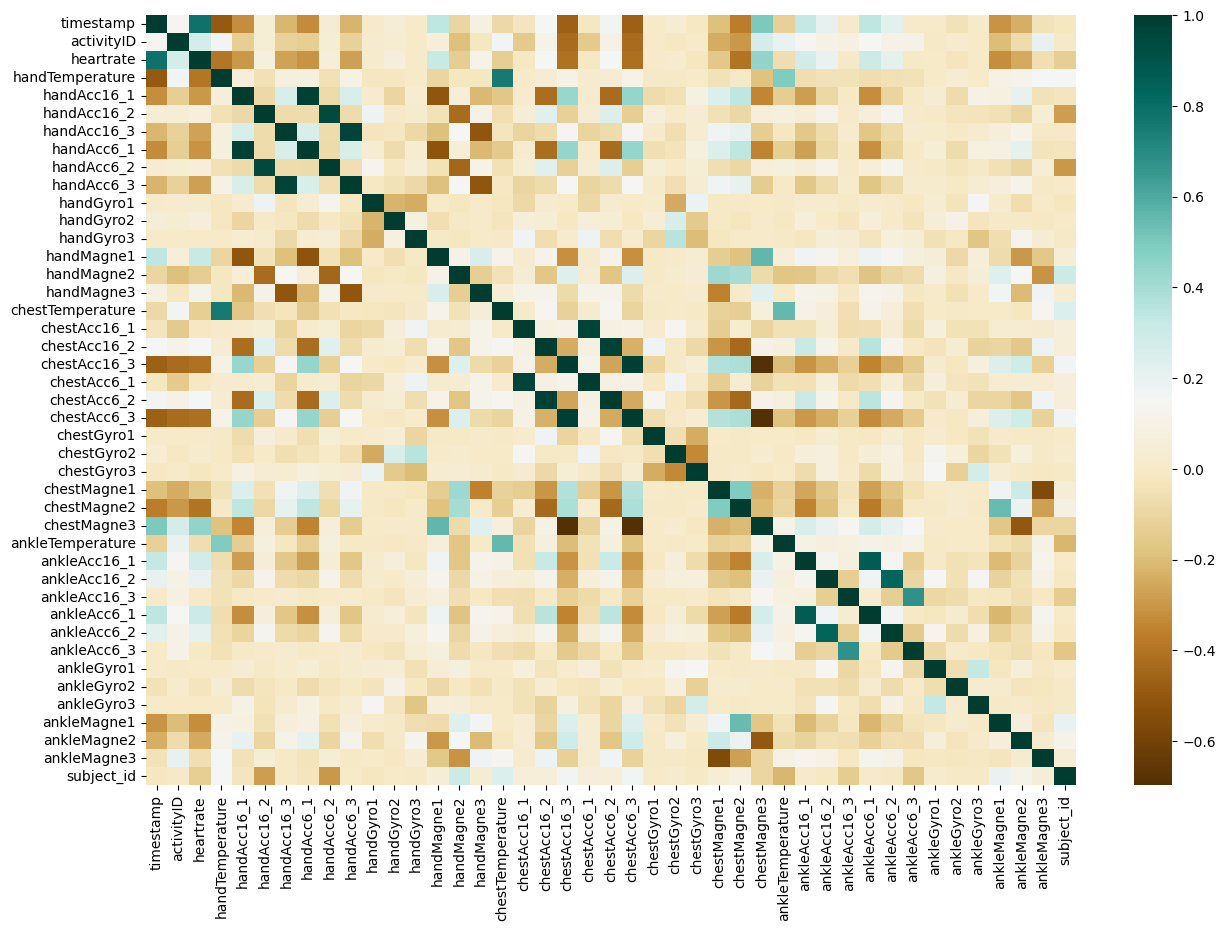

In [ ]:
from pandas.plotting import scatter_matrix

# the default correlation metric being used is Pearson's correlation
# which makes sense because we have numerical data

df_corr = dataCol.corr()
# df_corr = df_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap = "BrBG",ax=ax)
plt.show()

Our heatmap shows how much statistical similarity there is between our different columns. We can every easily observe that the gyroscopes do not correlate with any of our other data and seem unneeded in this model.

On the other hand we can understand the correlation between accelerometers of the hand and temperature. The two are strongly correlated on all three instances of hand accelerometers.

Furthermore the chest Magnetometers seem to be correlated with heart rate and it is very logical as they very close together on the body.

# **Sensors Analysis**

In [ ]:
result_id = dataCol.groupby(['subject_id']).mean().reset_index()

<ipython-input-24-3bf4ef4034ea>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


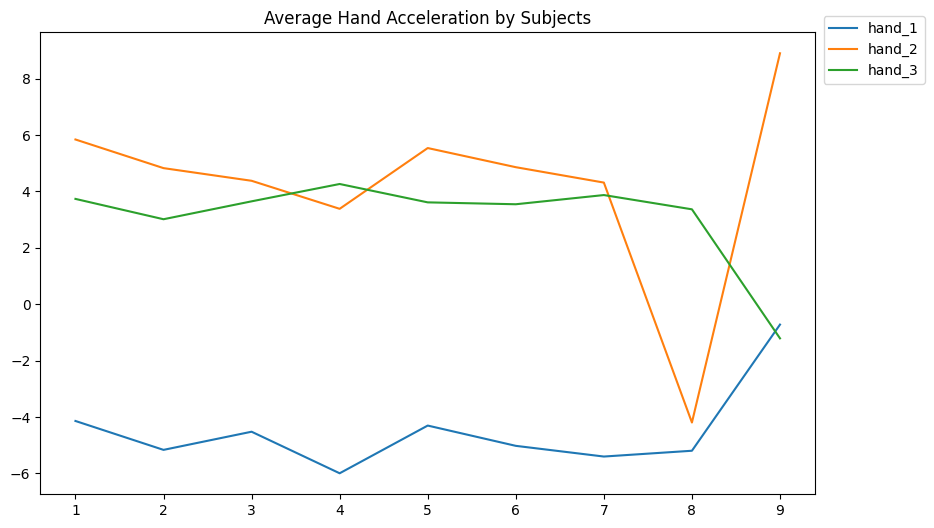

In [ ]:
#Get required data and plot

samp = pd.DataFrame()
samp['hand_1'] = result_id['handAcc16_1']
samp['hand_2'] = result_id['handAcc16_2']
samp['hand_3'] = result_id['handAcc16_3']
ax = samp.plot(kind='line', figsize=(10,6), title='Average Hand Acceleration by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 10, loc=1, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(samp)))

<ipython-input-25-ca09448c3851>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


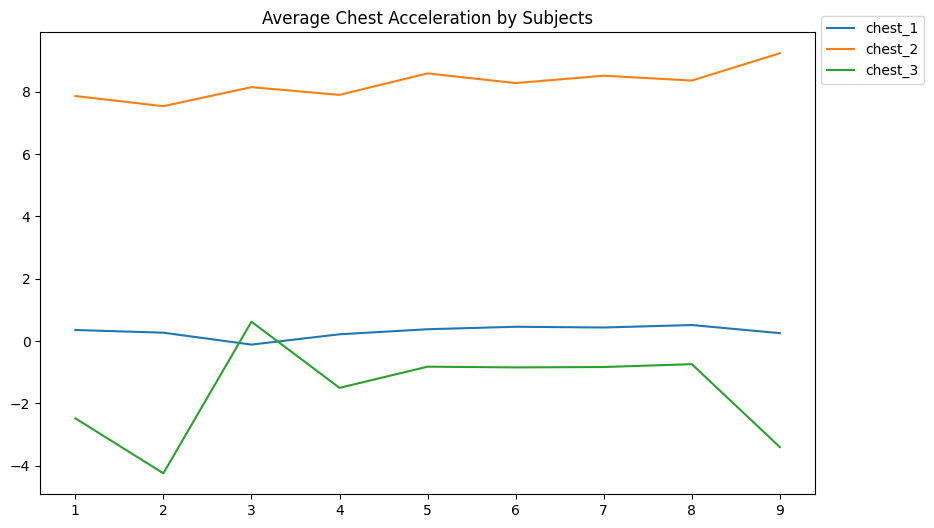

In [ ]:
samp = pd.DataFrame()
samp['chest_1'] = result_id['chestAcc16_1']
samp['chest_2'] = result_id['chestAcc16_2']
samp['chest_3'] = result_id['chestAcc16_3']
ax = samp.plot(kind='line', figsize=(10,6), title='Average Chest Acceleration by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 10, loc=1, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(samp)))

<ipython-input-26-b8691b2add0a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  a = ax.set_xticklabels(result_id['subject_id'])


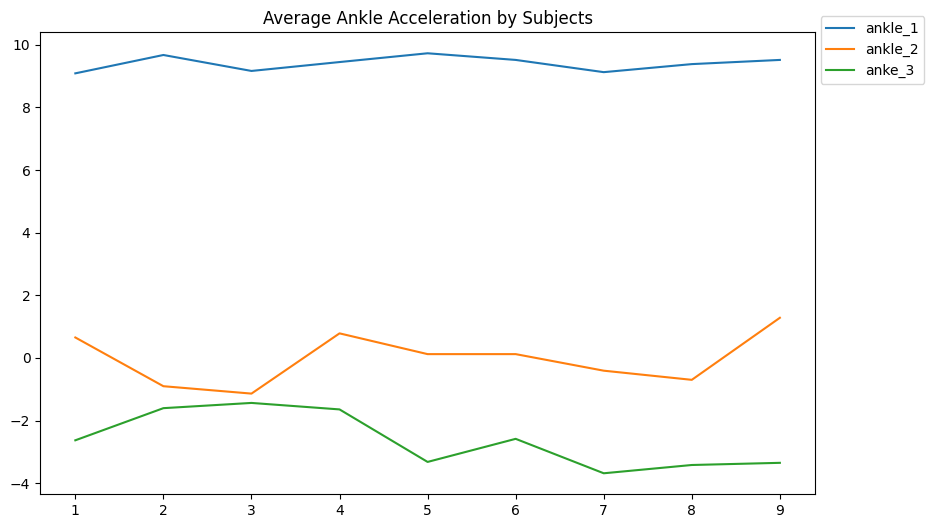

In [ ]:
samp = pd.DataFrame()
samp['ankle_1'] = result_id['ankleAcc16_1']
samp['ankle_2'] = result_id['ankleAcc16_2']
samp['anke_3'] =  result_id['ankleAcc16_3']
ax = samp.plot(kind='line', figsize=(10,6), title='Average Ankle Acceleration by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 10, loc=1, bbox_to_anchor=(1.15, 1.05))
c = ax.set_xticks(np.arange(len(samp)))